# 10.  1D Maps

## Preamble

In [37]:
import numpy as np
import math
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative
import scipy.linalg as lg

import sympy as sp
import fractions as fra
import itertools as itr

from tabulate import tabulate

from ipywidgets import interact

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%run -i "rcParameters.py"
#from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [3]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

## Utility functions

In [4]:
def NestList(f,x0,n0):
    '''
    generate nested list by applying f n=0,...,n0 times on x0
    input:  f(x,_), x0, n0=integer
    output: [x0,f(x0),f(f(x0)),...,f(...(f(x0)))]
    '''
    return [a for a in itr.accumulate(itr.repeat(x0,n0),f)]

def Nest(f,x,n):
    '''Applies function f n-times to x'''
    if n==0:
        return x
    return Nest(f,f(x),n-1)

In [5]:
# define Logistic Map (LM) and LM series
f_LM = lambda x,r: r*x*(1-x)
def logistic_series(x0,r,n):
    f = lambda x,_: f_LM(x,r)
    return NestList(f,x0,n)

In [49]:
# define Logistic Map (LM) and LM series
f_LM_ = lambda x,r: r*x*-x**3
def logistic_series(x0,r,n):
    f = lambda x,_: f_LM_(x,r)
    return NestList(f,x0,n)

In [6]:
# plot cobweb x_(n+1)=f(x_n)
def cobweb_f(f,x0,n0,ax,ls='-',col='r',lw=1):
    ax = ax or plt.gca
    f_ = lambda x,_: f(x)
    dat = NestList(f_,x0,n0)
    x = list(itr.chain(*zip(dat,dat)))
    ax.plot(x[:-1],x[1:],c=col,ls=ls,lw=lw)
    return ax

# plot cobweb {x_0,...,x_n}
def cobweb_x(xdat,ax,ls='-',col='r',lw=1,nS=1):
    ax = ax or plt.gca
    x = list(itr.chain(*zip(xdat,xdat)))
    ax.plot(x[nS:-1],x[nS+1:],c=col,ls=ls,lw=lw)
    return ax

## Logistic Map  $\;\;[x_{n+1}=f(x_n)=rx_n(1-x_n)]$

### Time series

In [7]:
# plot LM time series for x1,r1,n1
n1=51
x1=0.002; r1=3.7
@interact(r=(0.9,4,0.1))
def update(r=1):
    r1=r
    plt.plot(np.arange(n1),logistic_series(x1,r1,n1),c='gray',lw=1,marker='o',ms=6,mec='r',mfc='w',mew=1.5)
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.xlim(-1,n1+1)
    plt.ylim(-0.02,1)
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, min=0.9), Output()), _dom_classes=('wid…

### Cobweb 

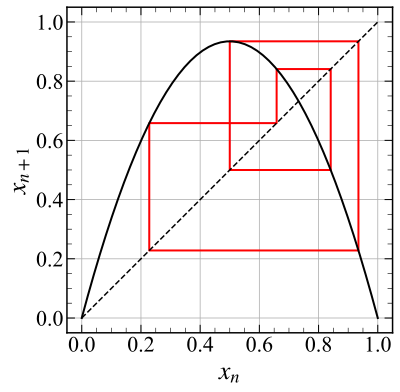

In [8]:
# plot LM cobweb for x1,r1,n1 [and from ns to n1 - colored]
n1=100; ns=90
x1=0.5; r1=3.7389149 # 2-cycle for 3<r<1+sqrt(6)=3.449..

fig, ax=plt.subplots()

dat = logistic_series(x1,r1,n1)
x_ = list(itr.chain(*zip(dat,dat)))
ax.plot(x_[1:-1],x_[2:],'b-',lw=0.75)
ax.plot(x_[ns:-1],x_[ns+1:],'r-',lw=2)

xx = np.linspace(0,1,50)
ax.plot(xx,xx,'k--')
ax.plot(xx,f_LM(xx,r1),'k-',lw=2)
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.set_xticks(np.arange(0,1.2,0.2))
plt.show()

In [9]:
# cobweb LM (interactive)
x1=0.5
xx = np.linspace(0,1,50)

@interact(r=(1.1,4,0.1),n0=(50,100,5))
def update(r=3.7389149,n0=30):

    fig, ax=plt.subplots()
    cobweb_x(logistic_series(x1,r,n0),ax)

    ax.plot(xx,xx,'k--')
    ax.plot(xx,f_LM(xx,r),'k-',lw=2)

    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.set_xticks(np.arange(0,1.2,0.2))
    plt.show()

interactive(children=(FloatSlider(value=3.7389149, description='r', max=4.0, min=1.1), IntSlider(value=50, des…

#### Cobweb example:  $x_{n+1}=\sin(x_n)$

In [ ]:
xx = np.linspace(0,2,50)
yy = np.sin(xx)

fig, ax=plt.subplots()
cobweb_f(lambda x: np.sin(x),np.pi/2,10,ax,lw=2)

ax.plot(xx,xx,'k--')
ax.plot(xx,yy,'k-',lw=2)

ax.set_aspect('equal')
ax.set_xlim(0,2)
ax.set_ylim(0,1.6)
ax.grid()
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.set_xticks(np.arange(0.5,2.5,0.5))
plt.show()

#### Cobweb example:  $x_{n+1}=\cos(x_n)$

In [ ]:
xx = np.linspace(-3,3,50)
yy = np.cos(xx)

fig, ax=plt.subplots()
cobweb_f(lambda x: np.cos(x),-2,50,ax,lw=2)

ax.plot(xx,xx,'k--')
ax.plot(xx,yy,'k-',lw=2)

ax.set_aspect('equal')
ax.set_xlim(-2.2,2.2)
ax.set_ylim(-2,2)
ax.grid()
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
# ax.set_xticks(np.arange(0.5,2.5,0.5))
plt.show()

### Orbit Diagram (OD) = Bifurcation Diagram (BD) showing only attractors 

In [56]:
# function to plot LM OD
def LM_OD(r_1,r_2,col='r',y1=0,y2=1,grid=True):
    s1=301;s2=600
    x1=0.1
    fig_OD, ax=plt.subplots(figsize=(8,6))
    for r0 in np.linspace(r_1,r_2,300):
        yy=logistic_series(x1,r0,s2)[s1:]
        xx=np.ones(len(yy))*r0
        ax.plot(xx,yy,'o',ms=0.2,mfc=col,mec=col)
    ax.grid(grid)
    ax.set_ylim(y1,y2)
    ax.set_xlabel('$r$')
    ax.set_ylabel('$x$')

In [55]:
# plot OD for 3.4 < r < 4    
#%time LM_OD(1,3) 

In [ ]:
# plot OD for 3.847 < r < 3.857 
LM_OD(3.847,3.857,y1=0.13,y2=0.18)

In [58]:
# plot OD for 0 < r < 4
#LM_OD(0,4,y1=-0.1,y2=1)

## Logistic Map - Analysis

#### Fixed points

In [21]:
# define sympy variable for analytical calculations
x,r,p,q = sp.symbols('x,r,p,q',nonnegative=True)
µ = sp.symbols('µ',real=True)

In [22]:
# fixed point equation x=f(x)
eq1=(f_LM(x,r)-x**3).simplify()
eq1

x*(-r*x + r - x**2)

In [23]:
# fixed points
sol1 = sp.solve(eq1,x)
sol1

[0, -sqrt(r)*sqrt(r + 4)/2 - r/2, sqrt(r)*sqrt(r + 4)/2 - r/2]

In [24]:
eq1_ = r*x - x**3
eq1_

r*x - x**3

In [26]:
sol1_ = sp.solve(eq1_,x)
sol1_

[0, -sqrt(r), sqrt(r)]

#### period-2 cycles

In [45]:
eq2_ = x*(x**2 - r + 1)*(x**2 - r + 1)*(x**4 - r*x**2 + 1).factor(x**2 -4 + 1)
eq2_

x*(-r + x**2 + 1)**2*(-r*x**2 + x**4 + 1)

In [46]:
# solve the 2-cycle equation: {q=f(p), p=f(q)}
sol2_ = sp.solve(eq2_,x)
display(Latex('$p = {}$; $q = {}$'.format(sp.latex(sol2_[1]),sp.latex(sol2_[0]))))

<IPython.core.display.Latex object>

In [47]:
# 2-cycle exists for 
sp.solve(r/2 - (sp.sqrt(r-2)*sp.sqrt(r+2))/2,r)

[]

In [50]:
# define f'(x;r) for the LM
f1_LM_ = f_LM_(x,r).diff(x).simplify()
fp_LM_ = sp.lambdify((x,r),f1_LM_)
f1_LM_

-4*r*x**3

In [51]:
# µ=stability factor 'lambda' for 2-cycle: µ=µ(p)*µ(q)
µ = (f1_LM_.subs(x,sol2[0])*f1_LM_.subs(x,sol2[1])).simplify()
µ

16*(r**3 + 3*r**2 + 3*r + 1)/r**4

In [52]:
sp.solve((µ>-1,µ<1),r)

(0 < r) & (2*CRootOf(x**4 - 8*x**3 - 12*x**2 - 6*x - 1, 1) < r)

In [48]:
# µ=stability factor 'lambda' for 2-cycle: µ=µ(p)*µ(q)
µ = (f1_LM.subs(x,sol2[0])*f1_LM.subs(x,sol2[1])).simplify()
µ

-r**2 + 2*r + 4

In [42]:
# define f'(x;r) for the LM
f1_LM = f_LM(x,r).diff(x).simplify()
fp_LM = sp.lambdify((x,r),f1_LM)
f1_LM

r*(1 - 2*x)

In [13]:
# equation for 2-cycle: x=f(f(x))
eq2 = (f_LM(f_LM(x,r),r)-x).factor()/x/(r*x-r+1)
eq2.factor(x)

-r**2*x**2 - r - x*(-r**2 - r) - 1

In [14]:
# solve the 2-cycle equation: {q=f(p), p=f(q)}
sol2 = sp.solve(eq2,x)
display(Latex('$p = {}$; $q = {}$'.format(sp.latex(sol2[1]),sp.latex(sol2[0]))))

<IPython.core.display.Latex object>

In [15]:
# 2-cycle exists for 
sp.solve(r**2-2*r-3>0,r)

3 < r

In [16]:
# define f'(x;r) for the LM
f1_LM = f_LM(x,r).diff(x).simplify()
fp_LM = sp.lambdify((x,r),f1_LM)
f1_LM

r*(1 - 2*x)

In [17]:
# µ=stability factor 'lambda' for 2-cycle: µ=µ(p)*µ(q)
µ = (f1_LM.subs(x,sol2[0])*f1_LM.subs(x,sol2[1])).simplify()
µ

-r**2 + 2*r + 4

In [18]:
# 2-cycles are stabel for:
sp.solve((µ>-1,µ<1),r)

(3 < r) & (r < 1 + sqrt(6))

In [19]:
# interactive plot of f(x),f2(x) and f4(x) for 2<r<4
xx = np.linspace(0,1,120)
# f2_LM = sp.lambdify((x,r),f_LM(f_LM(x,r),r))
@interact(r=(2,4,0.1))
def update(r=2):
    fig_f2_LM, ax=plt.subplots()

    ax.plot(xx,xx,'k--')
#     ax.plot(xx,f2_LM(xx,r),'b-',lw=2)
    for n0 in [1,2,4]:
        ax.plot(xx,Nest(lambda x: f_LM(x,r),xx,n0),label='$f^{:d}(x)$'.format(n0))
    
    ax.set_aspect('equal')
    ax.grid()
    ax.legend(loc=(1,0.7))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xticks(np.arange(0.2,1.2,0.2))
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, min=2.0), Output()), _dom_classes=('wid…

In [ ]:
# interactive cobweb of LM for 2.8<r<3.6
x1=0.1; n0=100
print('r2=1+sqrt(6)=',np.round(1+np.sqrt(6),4))
@interact(r1=(2.8,3.9,0.1))
def update(r1=2.8):
    fig, ax=plt.subplots()

    ax.plot(xx,xx,'k--')
    ax.plot(xx,f_LM(xx,r1),lw=2)
    cobweb_x(logistic_series(x1,r1,n0),ax,nS=90)

    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.set_xticks(np.arange(0,1.2,0.2))
    plt.show()

#### period-3 window at  $\;\;r_c=3.8284..< r < 3.8415..$, $\;\;[r_c=1+\sqrt(8)]$

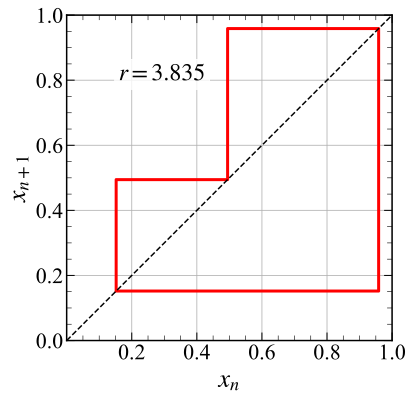

In [20]:
# cobweb for period-3 window @ r_c=3.8284..< r <3.8415..; r_c=1+sqrt(8)
# p=f(f(f(p)))
fig_p3, ax=plt.subplots()
cobweb_x(logistic_series(0.5,3.835,300),ax,nS=250,lw=3)
ax.set_aspect('equal')

ax.plot(xx,xx,'k--')

ax.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0.2,1.2,0.2))
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.text(0.16,0.8,'$r=3.835$',fontsize=24,bbox=dict(edgecolor='white',facecolor='white', alpha=0.8))
plt.show()

#### Intermitency ('ghost' of the 3-cycle) $\;\;r=3.8282$

In [ ]:
# Intermitency ('ghost' of the 3-cycle)
# cobweb for period-3 window @ r_c=3.8284..< r <3.8415..; r_c=1+sqrt(8)

fig_p3_, ax=plt.subplots()
cobweb_x(logistic_series(0.5,3.8282,50),ax,nS=1,lw=2,col='c')
cobweb_x(logistic_series(0.5,3.8282,800),ax,nS=1,lw=0.5)
cobweb_x(logistic_series(0.5,3.8282,800),ax,nS=1560,lw=2,col='b')
ax.set_aspect('equal')

ax.plot(xx,xx,'k--')

ax.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0.2,1.2,0.2))
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.text(0.06,0.9,'$r=3.8282$',fontsize=24,bbox=dict(edgecolor='white',facecolor='white', alpha=0.8))
plt.show()

## Lyapunov exponent

$\lambda=\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=0}^{n-1}\ln|f'(x_i)|=
\lim_{n\rightarrow\infty}\frac{1}{n}\ln\prod_{i=0}^{n-1}|f'(x_i)|$

#### Logistic Map (LM)  $\;\;[f(x)=rx(1-x)]$

Define Lyapunov exponent for the Logistic Map (LM)

In [ ]:
def lya_exp_LM(r0,n0=200,n1=50,x0=0.5):
    dat = np.array(logistic_series(x0,r0,n0))[n1:]
    return np.log(np.abs(fp_LM(dat,r0).prod()))/len(dat)

Calculate and plot Lyapunov exponent for LM as a function of $r$

In [ ]:
# generate list of r values
rr = np.linspace(0.01,3.99,2000)
# turn off error message "divide by zero"
np.seterr(divide = 'ignore') 
# calculate Lyapunov exponents for all r values
L_exp = [lya_exp_LM(r0) for r0 in rr] 

# plot lambda vs r [0 < r < 4]
fig_LexpLM, ax=plt.subplots(figsize=(8,5))

ym = np.ma.masked_greater_equal(L_exp,0)
yp = np.ma.masked_less_equal(L_exp,0)

ax.plot(rr,L_exp,'k-',lw=0.5,alpha=0.5)
ax.plot(rr,yp,'r-',lw=0.75)
ax.plot(rr,ym,'b-',lw=0.75)
ax.vlines(3.57,-5,2,color='m',lw=1,label='$r_{\infty}=3.5699..$')

ax.grid()
ax.legend()
ax.set_xlim(0,4)
ax.set_ylim(-4,1)
ax.set_xlabel('$r$')
ax.set_ylabel('$\lambda$')

# fig_LexpLM.savefig('FIGS/Lyapunov_LM.pdf')
plt.show()

In [ ]:
# generate list of r values
rr = np.linspace(3.5,4,2000)
# turn off error message "divide by zero"
np.seterr(divide = 'ignore') 
# calculate Lyapunov exponents for all r values
L_exp = [lya_exp_LM(r0) for r0 in rr] 

# plot lambda vs r [3.5 < r < 4]
fig_LexpLM_2, ax=plt.subplots(figsize=(8,5))

ym = np.ma.masked_greater_equal(L_exp,0)
yp = np.ma.masked_less_equal(L_exp,0)

ax.plot(rr,L_exp,'k-',lw=0.5,alpha=0.5)
lw=1
ax.plot(rr,yp,'r-',lw=lw)
ax.plot(rr,ym,'b-',lw=lw)
# ax.plot(rr,yp,'o',ms=1,mfc='r',mec='r')
# ax.plot(rr,ym,'o',ms=1,mfc='b',mec='b')

# chaos (lambda>0) only for r > 3.5699..
ax.vlines(3.57,-5,2,color='m',lw=1,label='$r_{\infty}=3.5699..$')

ax.grid()
ax.legend()
ax.set_xlim(3.5,4)
ax.set_ylim(-1.05,1)
ax.set_xlabel('$r$')
ax.set_ylabel('$\lambda$')

# fig_LexpLM.savefig('FIGS/Lyapunov_LM.pdf')
plt.show()

## Problems

#### 10.5.5.  OD for the `tent map` 

Tent map: $f(x,r)=rx$ for $0<x<1/2$, and $f(x,r)=r(1-x)$ for $1/2<x<1$.

In [ ]:
# define Tent Map (TM) and TM series
def f_TM(x,r):
    if x>0 and x<=0.5:
        res = r*x
    elif x>0.5 and x<1:
        res = r*(1-x)
    else:
        res = 0
    return res
def TM_series(x0,r,n):
    f = lambda x,_: f_TM(x,r)
    return NestList(f,x0,n)

In [ ]:
# plot OD for the tent map
def TM_OD(r_1,r_2,col='r',y1=0,y2=1,grid=True):
    s1=301;s2=600
    x1=0.4
    fig_ODTM, ax=plt.subplots(figsize=(8,6))
    for r0 in np.linspace(r_1,r_2,300):
        yy=TM_series(x1,r0,s2)[s1:]
        xx=np.ones(len(yy))*r0
        ax.plot(xx,yy,'o',ms=0.2,mfc=col,mec=col)
    ax.grid(grid)
    ax.set_ylim(y1,y2)
    ax.set_xlabel('$r$')
    ax.set_ylabel('$x$')

In [ ]:
TM_OD(1,2)

#### 10.5.6  Sine Map   $\;\;[f(x)=r\sin(\pi x)]$

Define Lyapunov exponent for the `sine map` (SM)

In [ ]:
# define sine series
def SM_series(x0,r,n):
    f = lambda x,_: r*np.sin(np.pi*x)
    return NestList(f,x0,n)
# derivative of the SM
fp_SM = lambda x,r0: r0*np.pi*np.cos(np.pi*x)
# define Lyapunov exponent
def lya_exp_SM(r0,n0=200,n1=50,x0=0.5):
    dat = np.array(SM_series(x0,r0,n0))[n1:]
    return np.log(np.abs(fp_SM(dat,r0).prod()))/len(dat)

Calculate and plot Lyapunov exponent for the `sine map` as a function of $r$

In [ ]:
# generate list of r values
rr = np.linspace(0.,1,2000)
# turn off error message "divide by zero"
np.seterr(divide = 'ignore') 
# calculate Lyapunov exponents for all r values
L_exp = [lya_exp_SM(r0) for r0 in rr] 

# plot lambda vs r [0 < r < 1]
fig_LexpSM, ax=plt.subplots(figsize=(8,5))

ym = np.ma.masked_greater_equal(L_exp,0)
yp = np.ma.masked_less_equal(L_exp,0)

ax.plot(rr,L_exp,'k-',lw=0.5,alpha=0.5)
lw=1
ax.plot(rr,yp,'r-',lw=lw)
ax.plot(rr,ym,'b-',lw=lw)

ax.grid()
ax.set_xlim(0,1)
ax.set_ylim(-3.9,1)
ax.set_xlabel('$r$')
ax.set_ylabel('$\lambda$')

# fig_LexpSM.savefig('FIGS/Lyapunov_SM.pdf')
plt.show()

In [ ]:
# generate list of r values
rr = np.linspace(0.85,1,2000)
# turn off error message "divide by zero"
np.seterr(divide = 'ignore') 
# calculate Lyapunov exponents for all r values
L_exp = [lya_exp_SM(r0) for r0 in rr] 

# plot lambda vs r [0 < r < 1]
fig_LexpSM_2, ax=plt.subplots(figsize=(8,5))

ym = np.ma.masked_greater_equal(L_exp,0)
yp = np.ma.masked_less_equal(L_exp,0)

ax.plot(rr,L_exp,'k-',lw=0.5,alpha=0.5)
lw=1
ax.plot(rr,yp,'r-',lw=lw)
ax.plot(rr,ym,'b-',lw=lw)
# ax.vlines(3.57,-5,2,color='m',lw=1,label='$r_{\infty}=3.5699..$')

ax.grid()
# ax.legend()
ax.set_xlim(0.85,1)
ax.set_ylim(-1.2,1)
ax.set_xlabel('$r$')
ax.set_ylabel('$\lambda$')

# fig_LexpSM_2.savefig('FIGS/Lyapunov_SM_2.pdf')
plt.show()